In [274]:
import pandas as pd
df=pd.read_csv('food_poisoning_reports_val.csv')


In [275]:
import numpy as np
data=df.iloc[:,0]
data=np.asarray(data)

## ***Preprocessing***

In [276]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.preprocessing import FunctionTransformer
import nltk
from nltk.stem import PorterStemmer
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [277]:

def stem_text(arr):
  list1=[]
  for text in arr:
    porter_stemmer=PorterStemmer()
    tokens = nltk.word_tokenize(text)
    stemmed_tokens = [porter_stemmer.stem(token) for token in tokens]
    list1.append(' '.join(stemmed_tokens))
  return list1

In [278]:
stemming_transformer = FunctionTransformer(func=stem_text)
stem_text(["hello how are you"])

['hello how are you']

In [279]:
def self1(x):
  return x
input=FunctionTransformer(func=lambda x:x)

In [280]:
def poisontxts(model):
  vectorizer=pipeline.named_steps['tfidf']
  model=pipeline.named_steps['kmeans']
  terms=vectorizer.get_feature_names_out()
  centroids=model.cluster_centers_.argsort()[:,::-1]
  keywords=['poison','vomit']
  labels=model.labels_
  clus_list=[30,30]
  for i in range(2):
    k=0
    for j in centroids[i,:30]:
      k=k+1
      if terms[j]=='poison':
        clus_list[i]=k
  cluster=clus_list.index(min(clus_list))
  poison_labels=[]
  labels=model.labels_
  for i in range(len(labels)):
    if labels[i]==cluster:
      poison_labels.append(i)
  return poison_labels










In [281]:
poison_txts=FunctionTransformer(func=poisontxts)

# ***Creating the pipeline***

In [282]:
pipeline=Pipeline([
        ('input1',input),
        ('stemming', stemming_transformer),
        ('tfidf', TfidfVectorizer()),
    ('kmeans',KMeans(n_clusters=2,init='k-means++',max_iter=100,n_init=1)),
    ('output',poison_txts)
])


In [283]:
pipeline.fit(data)

Pipeline(steps=[('input1',
                 FunctionTransformer(func=<function <lambda> at 0x780240d8b010>)),
                ('stemming',
                 FunctionTransformer(func=<function stem_text at 0x780240d8b2e0>)),
                ('tfidf', TfidfVectorizer()),
                ('kmeans', KMeans(max_iter=100, n_clusters=2, n_init=1)),
                ('output',
                 FunctionTransformer(func=<function poisontxts at 0x780240d8a950>))])

In [284]:
model=pipeline.named_steps['kmeans']
df['clusters']=model.labels_
clusters=df.groupby('clusters')


In [286]:
for label,group_df in clusters:
  print(label)
  print(group_df)

0
                                                 Text  label  clusters
0   I'm a teacher interested in incorporating nutr...      0         0
1   I'm a parent concerned about the lack of acces...      0         0
7   Requesting details on the application process ...      0         0
8   Inquiring about available resources for promot...      0         0
15  Visited farmers market; noticed excessive use ...      0         0
20  Inquiry regarding upcoming food safety worksho...      0         0
21  Seeking guidance on accessing government grant...      0         0
1
                                                 Text  label  clusters
2   I dined at XYZ restaurant last night and withi...      1         1
3   Ordered takeout from ABC eatery and regretted ...      1         1
4   Attended a catered event where the sushi looke...      1         1
5   Went to DEF fast food joint for a quick bite, ...      1         1
6   Bought some pre-packaged sandwiches from GHI c...      1         1
9 

In [287]:
!pip install dill
import dill

# Save the pipeline as a model file using dill
with open('pipeline_model_2.pkl', 'wb') as file:
    dill.dump(pipeline, file)

In [288]:
with open('pipeline_model_2.pkl', 'rb') as file:
    pipeline_model = dill.load(file)

In [289]:
pipeline_model.transform(data)

[2, 3, 4, 5, 6, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 22, 23, 24]

# *Evaluating the model*

In [290]:
from sklearn.metrics import f1_score
X_test=df.iloc[:,0]
y_test=df.iloc[:,1]

In [291]:
poison_labels=pipeline.transform(X_test)
pred=np.zeros(len(X_test))
pred[poison_labels]=1


In [292]:
f1score=f1_score(y_test,pred)
f1score

0.9090909090909091

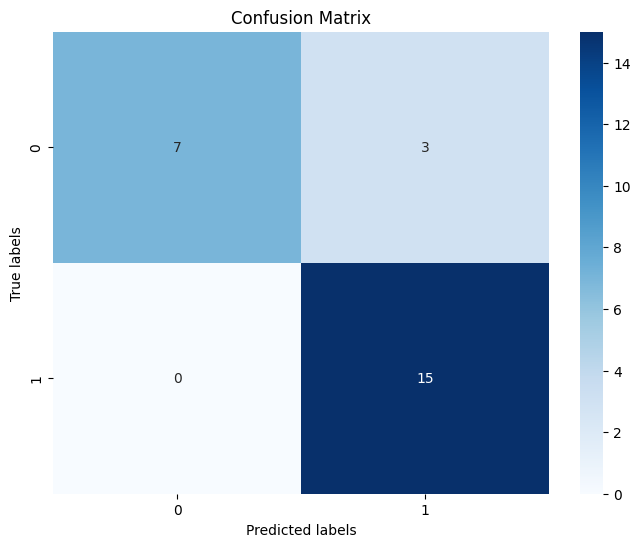

In [293]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

# **Printing the texts related to food poisoning**

In [294]:
poison_txts=[]
for txt in data[poison_labels]:
  poison_txts.append(txt)
poison_txts

['I dined at XYZ restaurant last night and within hours of consuming their seafood pasta, I was struck with severe stomach cramps and relentless vomiting. Absolutely appalling!',
 'Ordered takeout from ABC eatery and regretted it immediately. The chicken curry seemed off, and sure enough, I spent the entire night doubled over in agony. Never again!',
 "Attended a catered event where the sushi looked suspect, but I thought I'd give it a try. Big mistake! Spent the next two days bedridden with food poisoning. Avoid at all costs!",
 'Went to DEF fast food joint for a quick bite, and it turned into a nightmare. Their burgers might be cheap, but the food poisoning I got from them was anything but. Stay away!',
 'Bought some pre-packaged sandwiches from GHI convenience store, and it was the worst decision of my life. Spent the next 24 hours worshiping the porcelain god. Disgusting!',
 'Tried out JKL street food vendor and deeply regretted it. The tacos looked tempting, but the aftermath was 